# 数据加载

In [1]:
import numpy as np

we_train = np.load('../data/train_we_(32193, 120).npy')
we_test = np.load('../data/test_we_(1613, 120).npy')

y_train = np.load('../data/train_label_(32193, 2).npy')
y_test = np.load('../data/test_label_(1613, 2).npy')

we_train.shape, we_test.shape, y_train.shape, y_test.shape

((32193, 120), (1613, 120), (32193, 2), (1613, 2))

# 模型加载

In [3]:
from TextTransferModels import TwoBranchesBiGRU

## 默认参数：只使用 unrelated branch

In [4]:
model = TwoBranchesBiGRU().model
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
Embedding (Embedding)           (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
BiGRU (Bidirectional)           (None, 120, 64)      63936       Embedding[0][0]                  
__________________________________________________________________________________________________
mean_pooling (GlobalAveragePool (None, 64)           0           BiGRU[0][0]                      
__________________________________________________________________________________________________
max_poolin

## 参数修改：例如，使用 TwoBranches with Attention Fusion

In [5]:
model = TwoBranchesBiGRU(use_related_branch=True, use_unrelated_branch=True, fusion_mode='attention').model
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
Embedding (Embedding)           (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
BiGRU (Bidirectional)           (None, 120, 64)      63936       Embedding[0][0]                  
__________________________________________________________________________________________________
mean_pooling (GlobalAveragePool (None, 64)           0           BiGRU[0][0]                      
__________________________________________________________________________________________________
max_poolin

# Example: 训练与预测

In [6]:
from train import train

In [7]:
example_model = TwoBranchesBiGRU(
    use_related_branch=True, use_unrelated_branch=True, fusion_mode='attention').model

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Word2Vec (InputLayer)           (None, 120)          0                                            
__________________________________________________________________________________________________
Embedding (Embedding)           (None, 120, 300)     1800000     Word2Vec[0][0]                   
__________________________________________________________________________________________________
BiGRU (Bidirectional)           (None, 120, 64)      63936       Embedding[0][0]                  
__________________________________________________________________________________________________
mean_pooling (GlobalAveragePool (None, 64)           0           BiGRU[0][0]                      
__________________________________________________________________________________________________
max_poolin

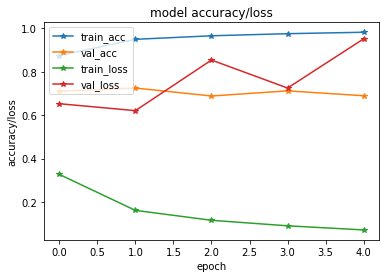


TEST_sz: 1613

Accuracy: 0.7247365158090514

              precision    recall  f1-score   support

       truth      0.707     0.856     0.775       891
       rumor      0.760     0.562     0.646       722

   micro avg      0.725     0.725     0.725      1613
   macro avg      0.734     0.709     0.711      1613
weighted avg      0.731     0.725     0.717      1613
 samples avg      0.725     0.725     0.725      1613




In [8]:
# 参数 model_name: best model的weights文件保存在 './model/{}.hdf5'.format(model_name) 路径下
train(model=example_model, model_name='example_model',
      train_data=we_train, test_data=we_test,
      train_label=y_train, test_label=y_test,
      epochs=5, batch_size=128)